# A brief introduction to communication in Swiss Politics

An original Radi project on communication in Swiss politics.

Authors:

* Arthur Vignon
* Deniz Ira 
* Isabelle Pumford
* Robin Zbinden

# Milestone 2 : Data handling

In this section, we gather the data and preprocess some of it.

In [1]:
# Standard imports. Tweepy is a library to interact easily with the Twitter API via Python.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import tweepy 
import csv
import os
import http.client
import tokenize

## Election Data

In this part, we load and clean the data regarding the elections. 

In [2]:
PATH_ELECTIONS_2015 = "data/elections/elections_2015.csv"
PATH_ELECTIONS_2019 = "data/elections/elections_2019.csv"

romand_cantons = ['Vaud','Jura','Genève','Valais / Wallis','Neuchâtel','Fribourg / Freiburg']
selected_parties = ['SVP','SP','FDP','CVP','GPS','GLP']
columns_required = {'wahl_jahr':'year','kanton_bezeichnung':'canton','partei_staerke':'party strength',
                    'partei_bezeichnung_de': "party's name in German",
                    'partei_bezeichnung_fr': "party's name in French",
                    'partei_bezeichnung_en': "party's name in English",
                    'fiktive_waehlende': 'fictional voter'}

# To understand the concept of fictional voter: https://en.wikipedia.org/wiki/National_Council_(Switzerland)

In [3]:
elections_2015 = pd.read_csv(PATH_ELECTIONS_2015, sep=';')
elections_2015

,wahl_jahr,kanton_nummer,kanton_bezeichnung,partei_id,partei_bezeichnung_de,partei_bezeichnung_fr,partei_bezeichnung_it,partei_bezeichnung_en,anzahl_listen,anzahl_kandidierende,...,letzte_wahl_anzahl_gewaehlte_f,letzte_wahl_anzahl_gewaehlte_m,differenz_anzahl_gewaehlte,differenz_anzahl_gewaehlte_f,differenz_anzahl_gewaehlte_m,fiktive_waehlende,partei_staerke,letzte_wahl_partei_staerke,differenz_partei_staerke,flag_staerkste_partei
0,2015,0,Schweiz,1,FDP,PLR,PLR,FDP,56.0,463.0,...,7,23,3,0,3,413445.315170,16.396787,15.104533,1.292254,0
1,2015,0,Schweiz,2,CVP,PDC,PPD,CVP,55.0,442.0,...,9,19,-1,0,-1,293652.367470,11.645930,12.304013,-0.658082,0
2,2015,0,Schweiz,3,SP,PS,PS,SP,57.0,482.0,...,21,25,-3,4,-7,475074.396680,18.840929,18.722161,0.118767,0
3,2015,0,Schweiz,4,SVP,UDC,UDC,SVP,53.0,433.0,...,6,48,11,5,6,740966.800710,29.385930,26.556254,2.829675,1
4,2015,0,Schweiz,7,EVP,PEV,PEV,EVP,15.0,214.0,...,2,0,0,0,0,47770.037490,1.894507,1.997398,-0.102891,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2015,26,Jura,4,SVP,UDC,UDC,SVP,1.0,2.0,...,0,0,0,0,0,3573.490789,12.846890,15.466406,-2.619516,0
217,2015,26,Jura,8,CSP,PCS,PCS,CSP,1.0,2.0,...,0,0,0,0,0,1840.051055,6.615081,0.000000,6.615081,0
218,2015,26,Jura,9,PdA/Sol.,PST/Sol.,PdL/Sol.,PdA/Sol.,1.0,2.0,...,0,0,0,0,0,1051.026703,3.778497,0.000000,3.778497,0
219,2015,26,Jura,13,GPS,PES,PES,GPS,2.0,4.0,...,0,0,0,0,0,2023.603565,7.274962,10.965142,-3.690179,0


In [4]:
elections_2015.columns

Index(['wahl_jahr', 'kanton_nummer', 'kanton_bezeichnung', 'partei_id',
       'partei_bezeichnung_de', 'partei_bezeichnung_fr',
       'partei_bezeichnung_it', 'partei_bezeichnung_en', 'anzahl_listen',
       'anzahl_kandidierende', 'anzahl_kandidierende_f',
       'anzahl_kandidierende_m', 'anzahl_gewaehlte', 'anzahl_gewaehlte_f',
       'anzahl_gewaehlte_m', 'letzte_wahl_anzahl_gewaehlte',
       'letzte_wahl_anzahl_gewaehlte_f', 'letzte_wahl_anzahl_gewaehlte_m',
       'differenz_anzahl_gewaehlte', 'differenz_anzahl_gewaehlte_f',
       'differenz_anzahl_gewaehlte_m', 'fiktive_waehlende', 'partei_staerke',
       'letzte_wahl_partei_staerke', 'differenz_partei_staerke',
       'flag_staerkste_partei'],
      dtype='object')

In [5]:
# We keep only the relevant columns
elections_2015 = elections_2015[columns_required.keys()]
elections_2015

,wahl_jahr,kanton_bezeichnung,partei_staerke,partei_bezeichnung_de,partei_bezeichnung_fr,partei_bezeichnung_en,fiktive_waehlende
0,2015,Schweiz,16.396787,FDP,PLR,FDP,413445.315170
1,2015,Schweiz,11.645930,CVP,PDC,CVP,293652.367470
2,2015,Schweiz,18.840929,SP,PS,SP,475074.396680
3,2015,Schweiz,29.385930,SVP,UDC,SVP,740966.800710
4,2015,Schweiz,1.894507,EVP,PEV,EVP,47770.037490
...,...,...,...,...,...,...,...
216,2015,Jura,12.846890,SVP,UDC,SVP,3573.490789
217,2015,Jura,6.615081,CSP,PCS,CSP,1840.051055
218,2015,Jura,3.778497,PdA/Sol.,PST/Sol.,PdA/Sol.,1051.026703
219,2015,Jura,7.274962,GPS,PES,GPS,2023.603565


In [6]:
elections_2019 = pd.read_csv(PATH_ELECTIONS_2019, sep=';')
elections_2019

,wahl_jahr,kanton_nummer,kanton_bezeichnung,partei_id,partei_bezeichnung_de,partei_bezeichnung_fr,partei_bezeichnung_it,partei_bezeichnung_en,anzahl_listen,anzahl_kandidierende,...,differenz_anzahl_gewaehlte_f,differenz_anzahl_gewaehlte_m,fiktive_waehlende,letzte_wahl_fiktive_waehlende,differenz_fiktive_waehlende,partei_staerke,letzte_wahl_partei_staerke,differenz_partei_staerke,flag_staerkste_partei,partei_rang
0,2019,0,Schweiz,1,FDP,PLR,PLR,FDP,64.0,523.0,...,3,-7,366302.636190,413445.315170,-47143,15.110236,16.396787,-1.286551,0.0,3.0
1,2019,0,Schweiz,2,CVP,PDC,PPD,CVP,77.0,702.0,...,-2,0,275842.090500,293652.367470,-17810,11.378676,11.645930,-0.267254,0.0,5.0
2,2019,0,Schweiz,3,SP,PS,PS,SP,76.0,604.0,...,0,-4,408128.086770,475074.396680,-66946,16.835564,18.840929,-2.005364,0.0,2.0
3,2019,0,Schweiz,4,SVP,UDC,UDC,SVP,67.0,569.0,...,2,-14,620342.797060,740966.800710,-120624,25.589567,29.385930,-3.796362,1.0,1.0
4,2019,0,Schweiz,7,EVP,PEV,PEV,EVP,23.0,306.0,...,0,1,50317.220712,47770.037490,2547,2.075620,1.894507,0.181113,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2019,26,Jura,7,EVP,PEV,PEV,EVP,1.0,2.0,...,0,0,322.839682,NaN,323,1.435353,NaN,1.435353,0.0,7.0
239,2019,26,Jura,8,CSP,PCS,PCS,CSP,3.0,6.0,...,0,0,2165.632648,1840.051055,326,9.628457,6.615081,3.013376,0.0,5.0
240,2019,26,Jura,9,PdA/Sol.,PST/Sol.,PdL/Sol.,PdA/Sol.,NaN,NaN,...,0,0,NaN,1051.026703,-1051,NaN,3.778497,-3.778497,NaN,NaN
241,2019,26,Jura,13,GPS,PES,PES,GPS,2.0,4.0,...,0,0,3514.140014,2023.603565,1491,15.623955,7.274962,8.348993,0.0,3.0


In [7]:
elections_2019.columns

Index(['wahl_jahr', 'kanton_nummer', 'kanton_bezeichnung', 'partei_id',
       'partei_bezeichnung_de', 'partei_bezeichnung_fr',
       'partei_bezeichnung_it', 'partei_bezeichnung_en', 'anzahl_listen',
       'anzahl_kandidierende', 'anzahl_kandidierende_f',
       'anzahl_kandidierende_m', 'anzahl_gewaehlte', 'anzahl_gewaehlte_f',
       'anzahl_gewaehlte_m', 'letzte_wahl_anzahl_gewaehlte',
       'letzte_wahl_anzahl_gewaehlte_f', 'letzte_wahl_anzahl_gewaehlte_m',
       'differenz_anzahl_gewaehlte', 'differenz_anzahl_gewaehlte_f',
       'differenz_anzahl_gewaehlte_m', 'fiktive_waehlende',
       'letzte_wahl_fiktive_waehlende', 'differenz_fiktive_waehlende',
       'partei_staerke', 'letzte_wahl_partei_staerke',
       'differenz_partei_staerke', 'flag_staerkste_partei', 'partei_rang'],
      dtype='object')

In [8]:
# We keep only the relevant columns
elections_2019 = elections_2019[columns_required.keys()]
elections_2019

,wahl_jahr,kanton_bezeichnung,partei_staerke,partei_bezeichnung_de,partei_bezeichnung_fr,partei_bezeichnung_en,fiktive_waehlende
0,2019,Schweiz,15.110236,FDP,PLR,FDP,366302.636190
1,2019,Schweiz,11.378676,CVP,PDC,CVP,275842.090500
2,2019,Schweiz,16.835564,SP,PS,SP,408128.086770
3,2019,Schweiz,25.589567,SVP,UDC,SVP,620342.797060
4,2019,Schweiz,2.075620,EVP,PEV,EVP,50317.220712
...,...,...,...,...,...,...,...
238,2019,Jura,1.435353,EVP,PEV,EVP,322.839682
239,2019,Jura,9.628457,CSP,PCS,CSP,2165.632648
240,2019,Jura,NaN,PdA/Sol.,PST/Sol.,PdA/Sol.,NaN
241,2019,Jura,15.623955,GPS,PES,GPS,3514.140014


In [9]:
# We merge elections 2015 and 2019 together and change language to english
elections = pd.concat([elections_2015, elections_2019])
elections = elections.rename(columns=columns_required)
elections = elections.loc[elections["party's name in English"].isin(selected_parties)]
elections = elections.sort_values(by='party strength',ascending=False)
elections.head()

,year,canton,party strength,party's name in German,party's name in French,party's name in English,fictional voter
61,2015,Nidwalden,82.817529,SVP,UDC,SVP,13380.0
123,2015,Appenzell Innerrhoden,76.308068,CVP,PDC,CVP,3121.0
69,2019,Nidwalden,64.204016,SVP,UDC,SVP,9655.0
140,2019,Appenzell Innerrhoden,61.271472,CVP,PDC,CVP,3460.0
138,2019,Appenzell Ausserrhoden,49.455477,SVP,UDC,SVP,7720.0


We distinguish the results of each party from the whole Switzerland, the french-speaking part and the german-part.

In [10]:
# We select the results from the whole Switzerland
swiss_elections = elections[elections['canton'] == 'Schweiz']
swiss_elections_2015 = swiss_elections.loc[swiss_elections['year'] == 2015]
swiss_elections_2019 = swiss_elections.loc[swiss_elections['year'] == 2019]
swiss_elections.head()

,year,canton,party strength,party's name in German,party's name in French,party's name in English,fictional voter
3,2015,Schweiz,29.385930,SVP,UDC,SVP,740966.80071
3,2019,Schweiz,25.589567,SVP,UDC,SVP,620342.79706
2,2015,Schweiz,18.840929,SP,PS,SP,475074.39668
2,2019,Schweiz,16.835564,SP,PS,SP,408128.08677
0,2015,Schweiz,16.396787,FDP,PLR,FDP,413445.31517


In [11]:
# We select the results from the french-speaking part of Switzerland
romand_elections = elections.loc[elections['canton'].isin(romand_cantons)]
romand_elections_2015 = romand_elections.loc[romand_elections['year'] == 2015]
romand_elections_2019 = romand_elections.loc[romand_elections['year'] == 2019]
romand_elections.head()

,year,canton,party strength,party's name in German,party's name in French,party's name in English,fictional voter
186,2015,Valais / Wallis,39.789846,CVP,PDC,CVP,50035.731565
206,2019,Valais / Wallis,34.784426,CVP,PDC,CVP,41364.248057
214,2015,Jura,27.631841,CVP,PDC,CVP,7686.072786
236,2019,Jura,27.008715,SP,PS,SP,6074.800098
173,2015,Vaud,26.836495,FDP,PLR,FDP,48358.289662


We aggregate the strength of each of the parties proportionnaly to the population that vote for them.

In [12]:
# Sum the fictionals voters of romand cantons for each party
romand_voters_2015 = romand_elections_2015[["party's name in English",'fictional voter']].groupby("party's name in English").sum()
romand_voters_2019 = romand_elections_2019[["party's name in English",'fictional voter']].groupby("party's name in English").sum()
romand_voters_2019

,fictional voter
party's name in English,
CVP,75977.884376
FDP,105674.328188
GLP,30445.144555
GPS,96785.210955
SP,101987.077991
SVP,95498.579716


In [13]:
# We select the results from the german-speaking part of Switzerland
alemannic_elections = elections.loc[~elections['canton'].isin(romand_cantons)]
alemannic_elections_2015 = alemannic_elections.loc[alemannic_elections['year'] == 2015]
alemannic_elections_2019 = alemannic_elections.loc[alemannic_elections['year'] == 2019]
alemannic_elections.head()

,year,canton,party strength,party's name in German,party's name in French,party's name in English,fictional voter
61,2015,Nidwalden,82.817529,SVP,UDC,SVP,13380.0
123,2015,Appenzell Innerrhoden,76.308068,CVP,PDC,CVP,3121.0
69,2019,Nidwalden,64.204016,SVP,UDC,SVP,9655.0
140,2019,Appenzell Innerrhoden,61.271472,CVP,PDC,CVP,3460.0
138,2019,Appenzell Ausserrhoden,49.455477,SVP,UDC,SVP,7720.0


In [14]:
# Sum the fictionals voters of alemannic cantons for each party
alemannic_voters_2015 = alemannic_elections_2015[["party's name in English",'fictional voter']].groupby("party's name in English").sum()
alemannic_voters_2019 = alemannic_elections_2019[["party's name in English",'fictional voter']].groupby("party's name in English").sum()
alemannic_voters_2019

,fictional voter
party's name in English,
CVP,4.757063e+05
FDP,6.186967e+05
GLP,3.478798e+05
GPS,5.431917e+05
SP,7.142691e+05
SVP,1.145187e+06


Then, we have everything we need regarding the elections: the strength of the parties in the whole Switzerland, the french-speaking part and the german-speaking part for the years 2015 and 2019.

## Retrieving data from the Twitter API

The aim of this part is to gather all possible tweets from major political parties in Switzerland and from the eminent members of those parties. We selected the 6 parties with the most representatives in the Swiss National Council since the last [2019 elections](https://en.wikipedia.org/wiki/2019_Swiss_federal_election) which are the UDC, PS, PLR, Les Verts, PDC and les Verts'libéraux  in our analysis. 

To get data from the Twitter API, one needs to create a developper account. We initialize the credentials obtained from Twitter below.

In [15]:
consumer_key_1 = "92AFPa7uaAAjwxBWTfpzsc9Gc" 
consumer_secret_1 = "i7KDx59hX2nhc1vCRxewAT4woaAVlW2MJ5CddZsCFRKpxzQIw5"
access_key_1 = "2934954767-JArTI62xesl1Q5VxNXf9Mx0Czeg9vjQ7MqYufGg"
access_secret_1 = "roWovEouQhFUK7j4MewuHIKiOfKHHeG0o6OzLh5jwPfbX"

We retrieve the Twitter accounts in both languages of the 6 major political parties in Switzerland. Note that all parties except PDC have seperate Twitter accounts for communucation in French and German. PDC does all its' Twitter communication in both languages from the same account.

In [16]:
# Twitter usernames of the 6 major political parties
frenchAccounts = ['UDCch', 'PSSuisse', 'PLR_Suisse', 'LesVertsSuisses', 'vertliberaux']
germanAccounts = ['SVPch', 'spschweiz', 'FDP_Liberalen', 'GrueneCH', 'grunliberale']
germanAndFrench = ['CVP_PDC']
users = frenchAccounts + germanAccounts + germanAndFrench

The function below gets all tweets from a given list of users. The Twitter API limits us to a hard limit of a maximum of 3200 tweets per user. We try to get as many tweets as possible from each of the accounts. The features we gather are the following: 

* ``id``: The ID of a tweet 
* ``timestamp`` : The time the tweet was published
* ``partyname`` : The name of the party as defined in the twitter account
* ``username`` : The actual unique twitter username 
* ``tweet_text`` : The content of the tweet
* ``all_hashtags`` : A list containing all hashtags included in the tweet
* ``all_mentions`` : A list containing all user mentions in the tweet
* ``all_urls`` : A list containing all the URLs in the tweet
* ``retweet_count`` : The number of retweets of the given tweet
* ``favorite_count`` : The number of favorites of the given tweet
* ``range`` : The number of characters in the tweet
* `lang` : The language of the tweet


In [16]:
# Function that retrieves the maximum possible number of tweets from given accounts into a csv file.
def get_party_tweets(users, consumer_key, consumer_secret, access_key, access_secret):
    
    # Authenticate to the Twitter API
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth,  parser=tweepy.parsers.JSONParser()) 
    
    # Open the CSV file to write to.
    with open('data/twitter_data/party_tweets.csv', 'w', encoding="utf-8") as file:

        w = csv.writer(file)

        # write Header row to spreadsheet
        w.writerow(['id', 'timestamp', 'partyname', 'username', 'tweet_text', 'all_hashtags', 'all_mentions', 'all_urls', 'retweet_count', 'favorite_count', 'range', 'lang'])
        
        # iterate over all usernames
        for username in users:
            # The index i is for the internal page indexing used in the Twitter API
            for i in range(18):
                # 200 is the maximum number of tweets one can retrieve per page: 200*18 = 3600 (above 3200 just to be sure)
                tweets = api.user_timeline(screen_name=username, count = 200, tweet_mode="extended", page = i)
                # Write the attributes in the CSV
                for tweet in tweets:
                    w.writerow([tweet['id'],
                                tweet['created_at'],
                                tweet['user']['name'],
                                tweet['user']['screen_name'], 
                                tweet['full_text'].replace('\n',' '),
                                [e['text'] for e in tweet['entities']['hashtags']],
                                [e['screen_name'] for e in tweet['entities']['user_mentions']],
                                [e['expanded_url'] for e in tweet['entities']['urls']],
                                tweet['retweet_count'],
                                tweet['favorite_count'],
                                tweet['display_text_range'][1],
                                tweet['lang']])

In [17]:
get_party_tweets(users, consumer_key_1, consumer_secret_1, access_key_1, access_secret_1)

Here we have the account names for all eminent members of the given parties.

In [18]:
PS_accounts = ['ChristianLevrat', 'NordmannRoger', 'beat_jans', 'jcschwaab', 'MarinaCarobbio', 'PascaleBruderer', 'SusanneSlo', 'enussbi', 'cedricwermuth', 'PaulRechsteiner', 'BaGysi', 'CarloSommaruga', 'danieljositsch', 'yferi', 'zanettiroberto', 'eviallemann', 'margretkiener', 'JayBadran', 'MathiasReynard', 'ada_marra']
PDC_accounts = ['SchmidFederer', 'ybuttet', 'ClaudeBegle', 'LeoMuellerLU', 'MarcoRomanoPPD', 'BulliardMarbach', 'fregazzi', 'Ch_Lohr', 'PirminBischof', 'gerhardpfister', 'lombardi1956', 'GraberKonrad', 'Violapamherd', 'RuthHumbel', 'MullerAltermatt', 'martin_candinas', 'Elisabeth_S_S', 'KathyRiklin', 'DdeBuman', 'engler_stefan']  
UDC_accounts = ['thomas_aeschi', 'AdrianAmstutz', 'BrandHeinz', 'jfrime', 'AmaudruzCeline', 'NatalieRickli', 'UGiezendanner', 'verenaherzog', 'SVPBrunner', 'lukasreimann', 'LuziStamm']
Les_Verts_accounts = ['bglaettli', 'RobertCramer_GE', 'SibelArslanBS', 'bastiengirod', 'RegulaRytz', 'nr_mayagraf', 'adelethorens', 'Chrige_Haesler', 'FrickerJonas']
Les_Verts_liberaux_accounts = ['tiana_moser', 'Martin_Baeumle', 'kathrinbertschy', 'beatflach', 'Juerg_Grossen', 'I_Chevalley']
PLR_accounts = ['nantermod', 'OliFrancais', 'CLuscher', 'ChristaMarkwald', 'IsabelleMoret', 'DorisFiala', 'RaphaelComteCE', 'SchneeDani67', 'fderder', 'ThierryBurkart', 'Marcel_Dobler', 'LaurentWehrli', 'Damian_Mueller_', 'FluriKurt', 'ignaziocassis', 'cwasi', 'PetraGoessi', 'RuediNoser']
all_member_accounts = PS_accounts + PDC_accounts + UDC_accounts + Les_Verts_accounts + Les_Verts_liberaux_accounts + PLR_accounts

In [19]:
# This is a helper function for us to identify the party name of the member
def get_party_name(username):
    if username in PS_accounts:
        return 'PS Suisse'
    elif username in PDC_accounts:
        return 'CVP PDC PPD PCD'
    elif username in UDC_accounts:
        return 'UDC Suisse'
    elif username in Les_Verts_accounts:
        return 'Les VERTS suisses 🌻'
    elif username in Les_Verts_liberaux_accounts:
        return "Vert'libéraux Suisse"
    elif username in PLR_accounts:
        return 'PLR Suisse'

In [20]:
# Function that retrieves the tweets of party members
def get_member_tweets(users, consumer_key, consumer_secret, access_key, access_secret, file_name):
    
    # Authenticate to the Twitter API
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth,  parser=tweepy.parsers.JSONParser()) 
    
    # Open the CSV file to write to.
    with open(file_name, 'w', encoding="utf-8") as file:

        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['id', 'timestamp', 'member_name', 'party_name', 'username', 'tweet_text', 'all_hashtags', 'all_mentions', 'all_urls', 'retweet_count', 'favorite_count', 'range', 'lang'])
        
        # iterate over all usernames
        for username in users:
            
            # Get the name of the members party
            party_name = get_party_name(username)
            
            for i in range(18):
                tweets = api.user_timeline(screen_name=username, count = 200, tweet_mode="extended", page = i)
                for tweet in tweets:
                    w.writerow([tweet['id'],
                                tweet['created_at'],
                                tweet['user']['name'],
                                party_name,
                                tweet['user']['screen_name'], 
                                tweet['full_text'].replace('\n',' '),
                                [e['text'] for e in tweet['entities']['hashtags']],
                                [e['screen_name'] for e in tweet['entities']['user_mentions']],
                                [e['expanded_url'] for e in tweet['entities']['urls']],
                                tweet['retweet_count'],
                                tweet['favorite_count'],
                                tweet['display_text_range'][1],
                                tweet['lang']])

The execution of the next line in order to the tweets of all members gives an error. This is normal since we retreive too many tweets. Twitter has a limit of the number of requests one can send in an hour. We just query with the remainder of the usernames and join the CSV's obtained.

In [22]:
get_member_tweets(all_member_accounts, consumer_key_1, consumer_secret_1, access_key_1, access_secret_1, 'data/twitter_data/member_tweets.csv' )

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

We look at our CSV file and see that we exceeded the rate limit for the tweets of 'DdeBuman'. We join the rest of the parties accounts to the members of PDC for which the retrieved tweets were incomplete and launch another query.

In [23]:
member_tweets_batch_2 = ['DdeBuman', 'engler_stefan'] + UDC_accounts + Les_Verts_accounts + Les_Verts_liberaux_accounts + PLR_accounts

In [24]:
get_member_tweets(member_tweets_batch_2, consumer_key_1, consumer_secret_1, access_key_1, access_secret_1, 'data/twitter_data/member_tweets_2.csv')

No error in the execution this time. We got the maximum number of tweets from all the accounts. Now we merge both member tweet files  `member_tweets_2.csv` and `member_tweets_2.csv` into a single one by putting them into a pandas DataFrame and deleting duplicate rows.

In [25]:
df1=pd.read_csv("data/twitter_data/member_tweets.csv")
df2=pd.read_csv("data/twitter_data/member_tweets_2.csv")

full_df = pd.concat([df1,df2])
unique_df = full_df.drop_duplicates(keep='last')
unique_df.to_csv('data/twitter_data/merged_member_tweets.csv', index=False)

Finally we remove the additional CSV files we created.

In [26]:
os.remove('data/twitter_data/member_tweets.csv')
os.remove('data/twitter_data/member_tweets_2.csv')

In [27]:
party_tweets = pd.read_csv("data/twitter_data/party_tweets.csv")
member_tweets = pd.read_csv("data/twitter_data/merged_member_tweets.csv")

## RTS Data 

### I. RTS Data extraction

RTS or Radio Télévision Suisse is the french language news source for Switzerland and features various different radio and television broadcasts. The meta data for these broadcasts since 1931 archived and available through the RTS API. This meta data includes summaries of the programs and speech to text of the broadcasts audio. We want to look at the interviews done with different party members at different points in time to see which topics they are discussing and potentially their sentiment about these topics.

In [30]:
# path to the datasets
BASE_PATH ='data/RTS_dataset'
AUTHORIZATION = 'WWNNR3l4Wmh0UnY3bDNIc3R2QkhyTVo3eFVHWUVGYzE6MmplUjNpVHRranNNM2ZsWA=='
RESOURCE_URL = "https://api.srgssr.ch/rts-archives/v3/broadcasts"

The RTS API uses an OAuth security to eliminate the need for a user to disclose their user id and secret. The OAuth service acts as an inbetween between the user and resource server and grants permission with a temporary access token that must be used in the same session as the authentication took place.  

In [31]:
def get_data(payload):
    
    headers = {
    'Authorization': AUTHORIZATION,
    'Cache-Control': 'no-cache',
    'Content-Length': '0',
    'Postman-Token': '24264e32-2de0-f1e3-f3f8-eab014bb6d76'
    }
    
    while True:
        conn = http.client.HTTPSConnection("api.srgssr.ch")
        url = "https://api.srgssr.ch/oauth/v1/accesstoken?grant_type=client_credentials"
        conn.request("POST",url, "", headers)
        res = conn.getresponse()
        data = res.read()
        decode_data = json.loads(data.decode("utf-8"))
        payload['Authorization'] = "Bearer " + decode_data['access_token']

        url = "/rts-archives/v3/broadcasts/?query={}&minPublicationDate={}&maxPublicationDate={}&start={}".format(
                                                                                                        payload['query'],
                                                                                                        payload['maxPublicationDate'],
                                                                                                        payload['minPublicationDate'],
                                                                                                        payload['start'])

        conn.request("GET", url, "", payload)
        res = conn.getresponse()
        data = res.read()
        decode_data = json.loads(data.decode("utf-8"))
        if 'code' not in decode_data:
            break
    
    return decode_data, payload

In [32]:
def build_dict(query = '', minPublicationDate = '', maxPublicationDate = '',minDurationSec = '',
               maxDurationSec = '', mediaTypes = '', enumeratedFacets = '', publicationDateIntervalFacets = '',
               durationSecIntervalFacets = '', start = '', rows=''):
    
    dict_ = {
             'accept': "application/json",
             'query' : query,
             'minPublicationDate' : minPublicationDate,
             'maxPublicationDate' : maxPublicationDate,
             'minDurationSec' : minDurationSec,
             'maxDurationSec' : maxDurationSec,
             'mediaTypes' : mediaTypes,
             'enumeratedFacets' : enumeratedFacets,
             'publicationDateIntervalFacets': publicationDateIntervalFacets,
             'durationSecIntervalFacets' : durationSecIntervalFacets,
             'start' : '0',
             'Postman-Token' : '56128353-805e-4974-6689-5ef6d86e2d80',
             'rows' : rows}

    return {k: v for k,v in dict_.items() if v}

In [33]:
def request_data_and_write(payload, path=''):

    data, payload = get_data(payload)
    number_documents = data['meta']['count']
        
    if number_documents <= 0:
        return
    number_rows = 25
    
    print("number of documents:{}".format(number_documents))
    
    if 'rows' in payload and payload['rows'] > 0:
        number_rows = payload['rows']
        
    number_requests = (number_documents + number_rows // 2) // number_rows
    
    if not os.path.exists(BASE_PATH + path):
        os.makedirs(BASE_PATH + path)

    with open(BASE_PATH + path + 'data_0.json', 'w') as outfile:
        json.dump(data, outfile)
    
    for n in range(1,number_requests):
        
        #Update payload
        payload['start'] = n * number_rows

        data = get_data(payload)[0]
        
        with open(BASE_PATH + path + 'data_{}.json'.format(n), 'w') as outfile:
            json.dump(data, outfile)

In [34]:
def request_data_per_year_and_party(year, party):
    print('requesting for year:{} and party:{}'.format(year, party))
    payload = build_dict(minPublicationDate='{}'.format(year), maxPublicationDate='{}'.format(year), query ='{}'.format(party))
    request_data_and_write(payload, '_per_year/{}/{}/'.format(year, party))

In [35]:
parties = ['UDC', 'PDC', 'PS', 'PLR', 'PES', 'PVL']

#After the initial run, it was difficult to find PES and PVL data as they are normally referred to as "les Verts" or "les Verts libéraux"
#So all data was gathered for the query "Verts" and will later be filtered for irrelevant data, PES or PVL
parties.append('Verts')
years = np.arange(2012, 2020)   
for year in years:
    for party in parties:
        request_data_per_year_and_party(year, party)

requesting for year:2012 and party:Verts
number of documents:210
requesting for year:2013 and party:Verts
number of documents:179
requesting for year:2014 and party:Verts
number of documents:129
requesting for year:2015 and party:Verts
number of documents:532
requesting for year:2016 and party:Verts
number of documents:1077
requesting for year:2017 and party:Verts
number of documents:1194
requesting for year:2018 and party:Verts
number of documents:1338
requesting for year:2019 and party:Verts
number of documents:1645


For each year between 2012 and 2019 and for each of the parties listed the RTS archives API was queried for any items that were relevant to the party names, including the generic "verts" which would be used later to add to the lists of PES and PVL as it was noted that RTS does not normally refer directly to the party abbreviations. 

These queries were returned in batches of 25 documents that were then stored in the RTS_dataset_per_year folder by year and then query.

### II. RTS Data Preprocessing

In [36]:
BASE_PATH ='data/RTS_dataset_per_year/{}/{}'
parties = ['UDC', 'PDC', 'PS', 'PLR', 'PES', 'PVL']
years = np.arange(2012, 2020)

In [37]:
#Next, we want to go year by year and find interviews that are with interviews of political parties
def read_in(party):
    party_dict =[]
    
    for year in years:
        if os.path.exists(BASE_PATH.format(year, party)):
            files = [f for f in os.listdir(BASE_PATH.format(year, party))]
            for file in files:
                with open(BASE_PATH.format(year, party)+"/{}".format(file), 'r') as fp:
                    dicts = json.load(fp)
                    for entry in dicts['data']:
                        if 'genres' in entry:
                            if 'Interview' in entry['genres']:
                                party_dict.append(dicts['data'])
    return party_dict

In [38]:
#For each party, convert the json into dictionaries

UDC_dictionary = read_in('UDC')
PDC_dictionary = read_in('PDC')
PS_dictionary = read_in('PS')
PLR_dictionary = read_in('PLR')
PES_dictionary = read_in('PES')
PVL_dictionary = read_in('PVL')

Above, the json created by querying the RTS archive API for each of the party abbreviations was created into lists of dictionaries. However, it was noted that RTS does not often use the abbreviations for the PES and PVL parties and prefers to use the Verts and Verts libéreaux. Another query was made using the key word "verts" to find more broadcasts for these parties. Below these broadcasts were sorted into either verts or verts libéraux

In [39]:
#Below looks and sees if libéraux is in the title of an entry, if it is then the entry is sorted to the PVL dictionary

for year in years:
    if os.path.exists(BASE_PATH.format(year, 'verts')):
            files = [f for f in os.listdir(BASE_PATH.format(year, 'verts'))]
            for file in files:
                with open(BASE_PATH.format(year, 'verts')+"/{}".format(file), 'r') as fp:
                    dicts = json.load(fp)
                    for entry in dicts['data']:
                        if ('title' and 'genres') in entry:
                            if 'Interview' in entry['genres']:
                                if 'libéraux' in entry['title']:
                                    PVL_dictionary.append(entry)
                                else:
                                    PES_dictionary.append(entry)


After reading in the lists of dictionaries, each dictionary is converted to a pandas dataframe. During on our analysis we will look at either the "speechToTexts" or "summary" collumns in order to do some NLP to determine what the key issues each party were discussing and potentially their sentiment about these topics.

In [40]:
UDC_pandas = pd.DataFrame(UDC_dictionary)
PDC_pandas = pd.DataFrame(PDC_dictionary)
PS_pandas = pd.DataFrame(PS_dictionary)
PLR_pandas = pd.DataFrame(PLR_dictionary)
PES_pandas = pd.DataFrame(PES_dictionary)
PVL_pandas = pd.DataFrame(PVL_dictionary)

# Milestone 3 : Data analyzing

In this section, we analyze the data obtained.

## Twitter analysis

In this subsection, we analyze the data from twitter.

In [38]:
# Additional imports for Milestone 3
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from scipy import spatial

from collections import Counter
import nltk #import the natural language toolkit library
from nltk.stem.snowball import FrenchStemmer #import the French stemming library
import re

# Word2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [10]:
# Stopwords in french (bring no information)
stopwords_fr = []
with open("data/stopwords/stopwords-fr.txt", 'r', encoding='utf-8') as f:
    stopwords_fr = f.readlines()
    stopwords_fr = [w.strip() for w in stopwords_fr]
stopwords_fr[:10]

['a', 'à', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies']

In [11]:
# TODO (DENIZ) explain why we remove that
stopwords_fr.remove('o|')

In [12]:
# punctations in french (bring no information)
punctuations_fr = "\"$%&'?!()*+,-./:;=@[\]^_`{|}'~«»´’–"

We deal with two datasets:

* The tweets from the parties themself
* The tweets from the members of the parties

In [13]:
# Load all the tweets
party_tweets = pd.read_csv("data/twitter_data/party_tweets.csv")
member_tweets = pd.read_csv("data/twitter_data/merged_member_tweets.csv")

In [14]:
def extract_year(tweets):
    """
    Add a new column called year and which contains the year of the tweets
    """
    tweets_copy = tweets.copy()
    tweets_copy['year'] = tweets_copy['timestamp'].str[-4:].astype(int)  
    return tweets_copy

In [15]:
# Add a year column to the tweets
party_tweets = extract_year(party_tweets)
member_tweets = extract_year(member_tweets)

In [16]:
# Change name of a column to be coherent
party_tweets = party_tweets.rename(columns={'partyname': 'party_name'})

In [17]:
party_tweets.head()

,id,timestamp,party_name,username,tweet_text,all_hashtags,all_mentions,all_urls,retweet_count,favorite_count,range,lang,year
0,1196812925580840961,Tue Nov 19 15:30:11 +0000 2019,UDC Suisse,UDCch,"Durant la session d’hiver à venir, le Parlemen...",[],[],['https://www.udc.ch/actualites/articles/commu...,0,5,259,fr,2019
1,1196375024124538880,Mon Nov 18 10:30:07 +0000 2019,UDC Suisse,UDCch,"Le glissement à gauche, qui a eu lieu lors des...",[],[],['https://www.udc.ch/actualites/articles/commu...,1,9,218,fr,2019
2,1189851774510874624,Thu Oct 31 10:29:04 +0000 2019,UDC Suisse,UDCch,"Au lieu d'attaquer le mal à la racine, le Cons...",[],[],['https://www.udc.ch/actualites/articles/commu...,2,7,145,fr,2019
3,1187013387508748288,Wed Oct 23 14:30:19 +0000 2019,UDC Suisse,UDCch,Les conséquences nuisibles de l’immigration dé...,[],[],['https://www.udc.ch/actualites/articles/commu...,3,17,208,fr,2019
4,1186266665358647298,Mon Oct 21 13:03:07 +0000 2019,UDC Suisse,UDCch,«Un tout grand Merci à toutes les électrices e...,[],[],[],7,28,272,fr,2019


In [18]:
member_tweets.head()

,id,timestamp,member_name,party_name,username,tweet_text,all_hashtags,all_mentions,all_urls,retweet_count,favorite_count,range,lang,year
0,1196747623471996928,Tue Nov 19 11:10:42 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,@patoudoux @nantermod Heureux pays... petits s...,[],"['patoudoux', 'nantermod']",[],0,5,56,fr,2019
1,1196741312264970240,Tue Nov 19 10:45:37 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,"RT @MikeMuellerLate: Liebe @claudia_blumer, ge...",[],"['MikeMuellerLate', 'claudia_blumer', 'tagesan...",[],27,0,140,de,2019
2,1196064766248280066,Sun Nov 17 13:57:16 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,"Des résultats convaincants, voire époustouflan...",[],"['MarinaCarobbio', 'zanettiroberto', 'PaulRech...",[],13,98,159,fr,2019
3,1193533989333749760,Sun Nov 10 14:20:52 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,Alors qu’on attend toujours les résultats (ent...,[],[],[],16,89,106,fr,2019
4,1193083434790531073,Sat Nov 09 08:30:31 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,"Merci d’y penser, de faire un effort et de pas...",[],[],[],7,41,194,fr,2019


In [19]:
party_tweets['party_name'].unique()

array(['UDC Suisse', 'PS Suisse', 'PLR Suisse', 'Les VERTS suisses 🌻',
       "Vert'libéraux Suisse", 'SVP Schweiz', 'SP Schweiz', 'FDP Schweiz',
       'GRÜNE Schweiz 🌻', 'Grünliberale Schweiz', 'CVP PDC PPD PCD'],
      dtype=object)

We observe that some party's names are in German or in French, thus we decide to rename all in French.

In [20]:
# Replace the german names of the parties by the french ones 
party_tweets.loc[(party_tweets.party_name == 'SVP Schweiz'), 'party_name'] = 'UDC Suisse'
party_tweets.loc[(party_tweets.party_name == 'SP Schweiz'), 'party_name'] = 'PS Suisse'
party_tweets.loc[(party_tweets.party_name == 'FDP Schweiz'), 'party_name'] = 'PLR Suisse'
party_tweets.loc[(party_tweets.party_name == 'GRÜNE Schweiz 🌻'), 'party_name'] = 'Les VERTS suisses 🌻'
party_tweets.loc[(party_tweets.party_name == 'Grünliberale Schweiz'), 'party_name'] = "Vert'libéraux Suisse"
party_tweets['party_name'].unique()

array(['UDC Suisse', 'PS Suisse', 'PLR Suisse', 'Les VERTS suisses 🌻',
       "Vert'libéraux Suisse", 'CVP PDC PPD PCD'], dtype=object)

In [21]:
member_tweets['party_name'].unique()

array(['PS Suisse', 'CVP PDC PPD PCD', 'UDC Suisse',
       'Les VERTS suisses 🌻', "Vert'libéraux Suisse", 'PLR Suisse'],
      dtype=object)

As we have now the same party's names for same party for all the tweets, we can concatenate **all the tweets in one dataframe.**

In [29]:
# Group all the tweets (member + party) in one dataframe 
tweets = pd.concat([party_tweets, member_tweets], sort=True)
tweets.head()

,all_hashtags,all_mentions,all_urls,favorite_count,id,lang,member_name,party_name,range,retweet_count,timestamp,tweet_text,username,year
0,[],[],['https://www.udc.ch/actualites/articles/commu...,5,1196812925580840961,fr,NaN,UDC Suisse,259,0,Tue Nov 19 15:30:11 +0000 2019,"Durant la session d’hiver à venir, le Parlemen...",UDCch,2019
1,[],[],['https://www.udc.ch/actualites/articles/commu...,9,1196375024124538880,fr,NaN,UDC Suisse,218,1,Mon Nov 18 10:30:07 +0000 2019,"Le glissement à gauche, qui a eu lieu lors des...",UDCch,2019
2,[],[],['https://www.udc.ch/actualites/articles/commu...,7,1189851774510874624,fr,NaN,UDC Suisse,145,2,Thu Oct 31 10:29:04 +0000 2019,"Au lieu d'attaquer le mal à la racine, le Cons...",UDCch,2019
3,[],[],['https://www.udc.ch/actualites/articles/commu...,17,1187013387508748288,fr,NaN,UDC Suisse,208,3,Wed Oct 23 14:30:19 +0000 2019,Les conséquences nuisibles de l’immigration dé...,UDCch,2019
4,[],[],[],28,1186266665358647298,fr,NaN,UDC Suisse,272,7,Mon Oct 21 13:03:07 +0000 2019,«Un tout grand Merci à toutes les électrices e...,UDCch,2019


In [30]:
# We also the members
tweets[-5:]

,all_hashtags,all_mentions,all_urls,favorite_count,id,lang,member_name,party_name,range,retweet_count,timestamp,tweet_text,username,year
132835,['Ecopop'],[],[],31,535102663692914689,de,Ruedi Noser,PLR Suisse,103,21,Wed Nov 19 16:09:51 +0000 2014,Auch wenn wir uns in der 30% Marke befinden – ...,RuediNoser,2014
132836,['Swissness'],"['silvan_z', 'AargauerZeitung']",['http://ow.ly/Ew1k8'],1,535016276029374464,de,Ruedi Noser,PLR Suisse,82,0,Wed Nov 19 10:26:34 +0000 2014,Verordnungsstress um #Swissness. @silvan_z @Aa...,RuediNoser,2014
132837,['Innovationspark'],"['BaSchaffner', 'RuediNoser', 'NZZ']",[],0,534340108951244800,de,Ruedi Noser,PLR Suisse,140,1,Mon Nov 17 13:39:44 +0000 2014,RT @BaSchaffner: @RuediNoser @NZZ Deshalb JA z...,RuediNoser,2014
132838,['Innovationspark'],['NZZ'],['http://ow.ly/i/7BDgb'],1,534259720618381312,de,Ruedi Noser,PLR Suisse,96,1,Mon Nov 17 08:20:18 +0000 2014,Wie der #Innovationspark Schweiz private Inves...,RuediNoser,2014
132839,[],['mhegi'],[],1,533916376315207680,de,Ruedi Noser,PLR Suisse,38,0,Sun Nov 16 09:35:58 +0000 2014,"@mhegi bitte, gerne geschehen, än Gutä",RuediNoser,2014


In [31]:
print("Years of activity for each party: ")
years_UDC = party_tweets[party_tweets.party_name=='UDC Suisse']['year'].unique()
print("UDC: %s" % years_UDC)
years_PS = party_tweets[party_tweets.party_name=='PS Suisse']['year'].unique()
print("PS: %s" % years_PS)
years_PLR = party_tweets[party_tweets.party_name=='PLR Suisse']['year'].unique()
print("PLR: %s" % years_PLR)
years_VERTS = party_tweets[party_tweets.party_name=='Les VERTS suisses 🌻']['year'].unique()
print("VERTS: %s" % years_VERTS)
years_VERTS_LIB = party_tweets[party_tweets.party_name=="Vert'libéraux Suisse"]['year'].unique()
print("VERTS LIB: %s" % years_VERTS_LIB)
years_PDC = party_tweets[party_tweets.party_name=='CVP PDC PPD PCD']['year'].unique()
print("PDC: %s" % years_PDC)

Years of activity for each party: 
UDC: [2019 2018 2017 2016 2015 2014 2013]
PS: [2019 2018 2017 2016 2015 2014 2013 2012 2011]
PLR: [2019 2018 2017 2016 2015]
VERTS: [2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]
VERTS LIB: [2019 2018 2017 2016 2015 2014 2012 2011 2010]
PDC: [2019 2018 2017]


### Keywords of parties

We are interested in the keywords used by the parties.

In [36]:
YEARS = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

def tweets_to_text(tweets, lang, party_name, year=YEARS, dictionary_words = False , dictionary = None):
    """
    Returns a text of all the tweets of a party after processing them.
    
    lang: {'fr','de'}
    username: {'PS Suisse', 'CVP PDC PPD PCD', 'UDC Suisse',
       'Les VERTS suisses 🌻', "Vert'libéraux Suisse", 'PLR Suisse'}
    year: default = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
    # TODO (DENIZ) add the description of the arguments dictionary and dictionars_words
    """
    
    # We keep only the tweets that we are interested in
    tweets_copy = tweets.copy()
    tweets_copy = tweets_copy[tweets_copy.lang==lang]
    tweets_copy = tweets_copy[tweets_copy.party_name==party_name]
    tweets_copy = tweets_copy[tweets_copy['year'].isin(year)]
    
    tweets_copy = tweets_copy["tweet_text"].str.lower()

    # We concatenate all the tweets
    text = ""
    for t in tweets_copy:
        text += ' ' +  t
    
    text = re.sub(r'https:\/\/t\.co\/.{10}', '', text)
    text = re.sub(r'http:\/\/t\.co\/.{10}', '', text)
    
    if (lang=='fr'):
        for c in punctuations_fr:
            # Remove the punctuations
            text = text.replace(c, ' ')
        for w in stopwords_fr:
            # Remove the stopwords
            regex = r" " + w + " "
            text = re.sub(regex, ' ', text)
            
        # To remove the multiple space
        text = text.replace('  ', ' ')
        text = text.replace('  ', ' ')
        text = text.replace('  ', ' ')
        
        if dictionary_words:
            # TODO (Deniz) explain what is done here
            splitted_text = text.split()
            text = [t for t in splitted_text if t in dictionary]
        return text
    else:
        # German was so hard to understand and to process
        raise NotImplementedError    

def text_to_bag(text, dictionary_words = False):
    """
    Return a bag of word sorted by frequency given a text
    # TODO (Add more doc)
    """
    if dictionary_words:
        return Counter(text).most_common()
    else:
        return Counter(text.split(" ")).most_common()

In [39]:
# Generating the text (all the tweets concatenated and pre-processed) for all parties
VERTS_text = tweets_to_text(tweets, lang='fr', party_name='Les VERTS suisses 🌻')
UDC_text = tweets_to_text(tweets, lang='fr', party_name='UDC Suisse')
PLR_text = tweets_to_text(tweets, lang='fr', party_name='PLR Suisse')
PDC_text = tweets_to_text(tweets, lang='fr', party_name='CVP PDC PPD PCD')
PS_text = tweets_to_text(tweets, lang='fr', party_name='PS Suisse')
VERTS_LIB_text = tweets_to_text(tweets, lang='fr', party_name="Vert'libéraux Suisse")

In [40]:
def stem_words(words):
    '''stems the word list using the French Stemmer'''
    #stemming words
    stemmed_words = [] #declare an empty list to hold our stemmed words
    stemmer = FrenchStemmer() #create a stemmer object in the FrenchStemmer class
    for word in words:
        stemmed_word=stemmer.stem(word) #stem the word
        stemmed_words.append(stemmed_word) #add it to our stemmed word list
    stemmed_words.sort() #sort the stemmed_words
    return stemmed_words

In [41]:
# TODO Why this cell exists ? With only VERTS_text ?
stemmed_words = stem_words(re.sub(r'\d', ' ', re.sub(r'#', ' ', VERTS_text)).split())
stemmed_words[:5]

['a', 'a', 'a', 'a', 'aa']

In [47]:
# Compute bag of words
VERTS_bag = text_to_bag(VERTS_text)
UDC_bag = text_to_bag(UDC_text)
PLR_bag = text_to_bag(PLR_text)
PDC_bag = text_to_bag(PDC_text)
PS_bag = text_to_bag(PS_text)
VERTS_LIB_bag = text_to_bag(VERTS_LIB_text)

VERTS_bag[:5]

[('verts', 920),
 ('adelethorens', 592),
 ('conseil', 534),
 ('suisse', 534),
 ('lesvertssuisses', 505)]

### Wordclouds

Using the frequency of the words, we draw wordcloud with all the tweets of each party

In [48]:
def draw_wordcloud(image_file, text):
    """
    Draws a wordcloud based on a given image (logo of a party) and a given text.
    """
    mask = np.array(Image.open(image_file).convert('RGB'))
    wordcloud = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)
    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[20,10])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    # store to file
    #plt.savefig("img/party.png", format="png")
    plt.show()

We use a French dictionnary here to have more meaningful words for the wordclouds.

In [53]:
# Dictionnary of the words in french
with open('data/frenchwords', 'r',  encoding="utf-8") as file:
    french_words = file.read().replace('\n', '|')
french_words[:113]

'a|à|abaissa|abaissaient|abaissais|abaissait|abaissant|abaisse|abaissé|abaissée|abaissées|abaissement|abaissements'

In [54]:
# Generating the text (all the tweets concatenated and pre-processed) for all parties but with a dictionnary
PLR_dict_text_list = tweets_to_text(tweets, lang='fr', party_name='PLR Suisse', dictionary_words=True, dictionary=french_words)
VERTS_dict_text_list = tweets_to_text(tweets, lang='fr', party_name= 'Les VERTS suisses 🌻', dictionary_words=True, dictionary=french_words)
UDC_dict_text_list = tweets_to_text(tweets, lang='fr', party_name='UDC Suisse', dictionary_words=True, dictionary=french_words)
PDC_dict_text_list = tweets_to_text(tweets, lang='fr', party_name='CVP PDC PPD PCD', dictionary_words=True, dictionary=french_words)
PS_dict_text_list = tweets_to_text(tweets, lang='fr', party_name='PS Suisse', dictionary_words=True, dictionary=french_words)
VERTS_LIB_dict_text_list = tweets_to_text(tweets, lang='fr', party_name="Vert'libéraux Suisse", dictionary_words=True, dictionary=french_words)

In [55]:
# Create arrays of the texts
PLR_dict_text = " ".join(PLR_dict_text_list)
VERTS_dict_text = " ".join(VERTS_dict_text_list)
UDC_dict_text = " ".join(UDC_dict_text_list)
PDC_dict_text = " ".join(PDC_dict_text_list)
PS_dict_text = " ".join(PS_dict_text_list)
VERTS_LIB_dict_text = " ".join(VERTS_LIB_dict_text_list)

We have now everything to draw the wordcloud for each party

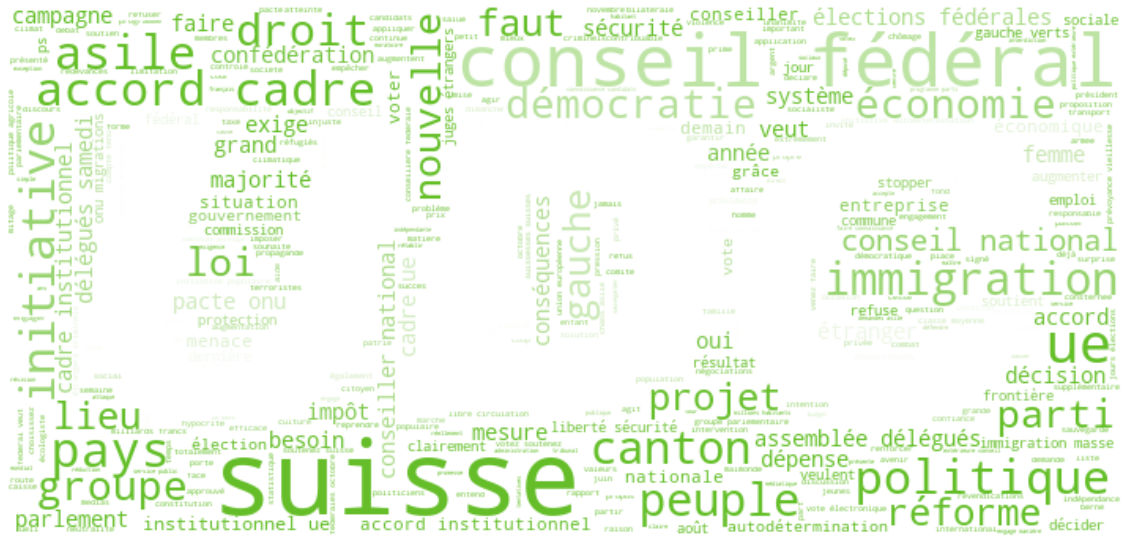

In [56]:
draw_wordcloud("data/logo/UDC_logo.jpg", UDC_dict_text)

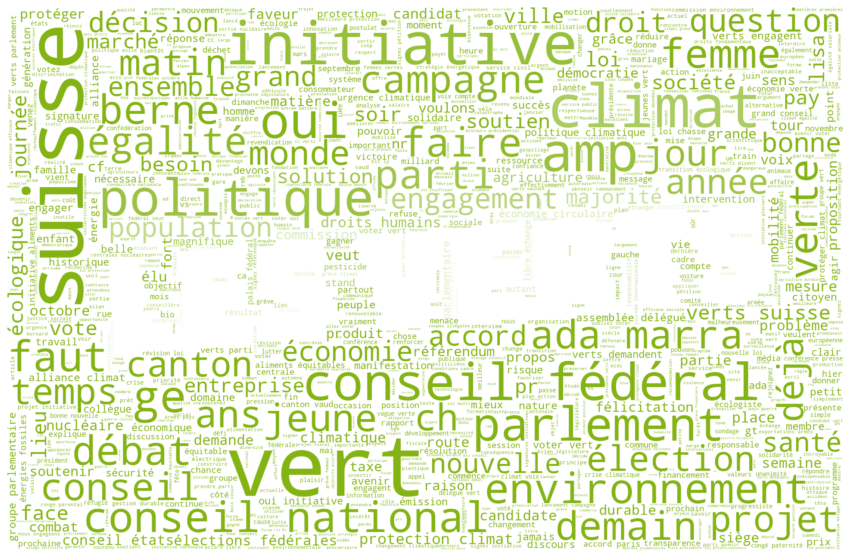

In [57]:
draw_wordcloud("data/logo/VERTS_logo.png", VERTS_dict_text)

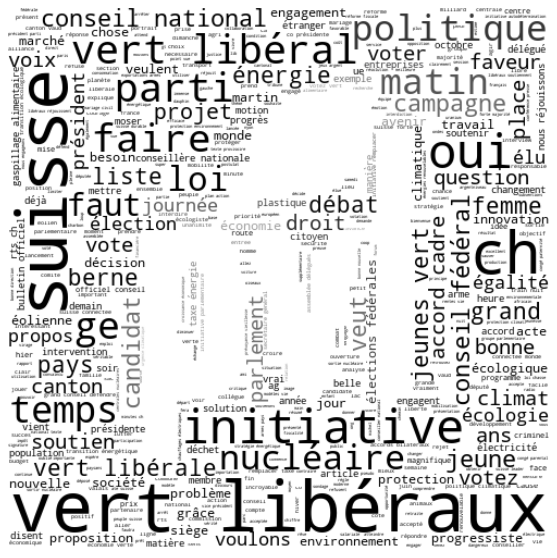

In [59]:
draw_wordcloud("data/logo/VERTS_LIB_logo.png", VERTS_LIB_dict_text)

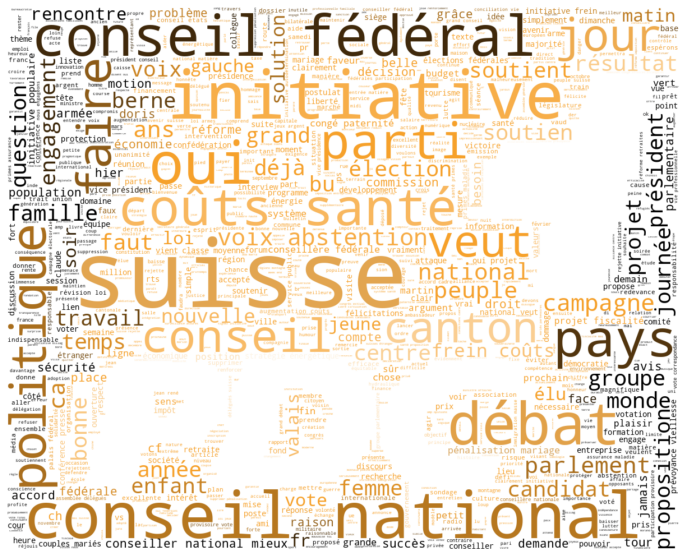

In [60]:
draw_wordcloud("data/logo/PDC_logo.png", PDC_dict_text)

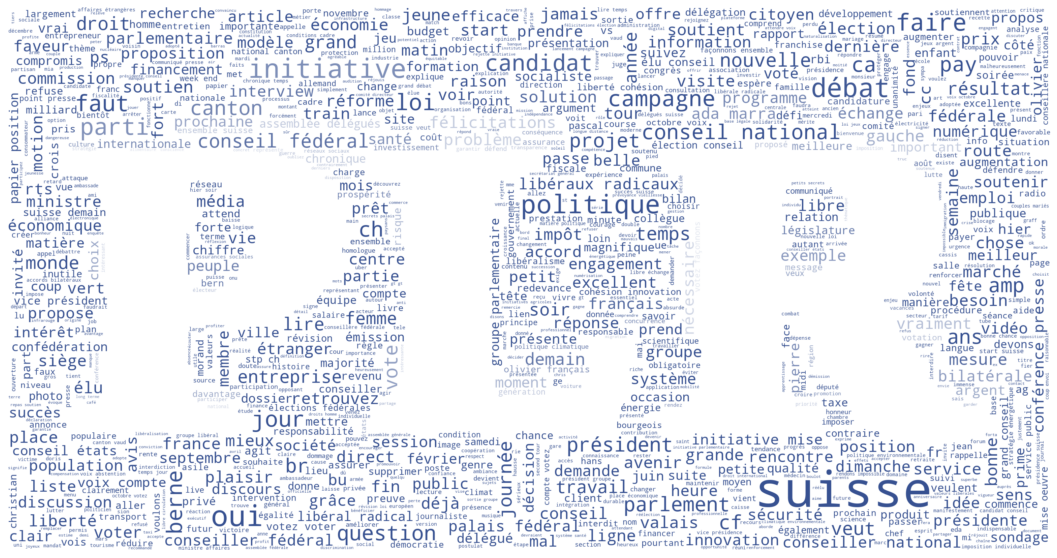

In [61]:
draw_wordcloud("data/logo/PLR_logo.png", PLR_dict_text)

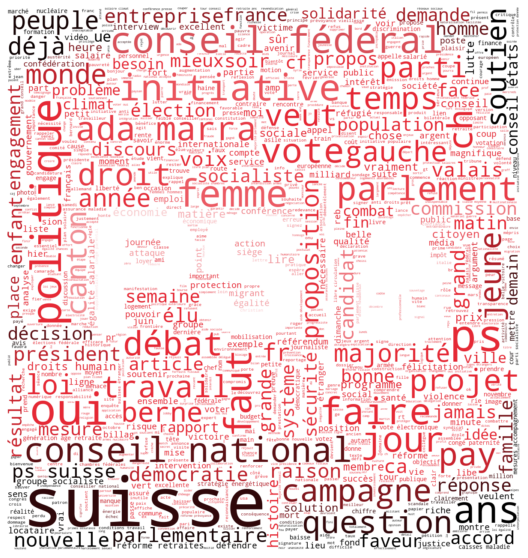

In [62]:
draw_wordcloud("data/logo/PS_logo.png", PS_dict_text)

### Topics

We are now interested in which topics do the parties talk the most.

TODO, talk about the LDA stuff and how the topics work


In [71]:
# Partially based on https://www.rts.ch/info/suisse/10732046-les-primes-maladie-perdraient-en-influence-sur-les-choix-electoraux.html
topic_list_reg = {'Climate':'climat|environnement|co2',
                'Immigration':'migration|asile|étranger|réfugié',
                'Safety':'sécurité|crimi|crime|sûr\b|sûre\b',
                'Liberty':'liberté|libre',
                'Egality':'égalit|solida',
                'Economy':'économi|marché',
                'Work':'travail|emploi|entreprise|chômage|chômeur|salaire|salarial',
                'Women':'femme',
                'Digital':'numérique|internet|digital',
                'Family':'famille|mariage|enfant',
                'AVS':'avs',
                'Health':'santé|maladie|médecin',
                'Europe':'europ| ue |#ue',
                'Army':'armée|militair|militaris|gripen'
                  }

The following helpers methods are used to select only the keywords of the topics in the tweets, and then to get the frequency or the number of occurence of the topics.

In [67]:
# Keep only the values of the topics list regex 
def topic_list_to_regex(topic_list):
    list_keywords = list(topic_list.values())
    keywords = ''
    for k in list_keywords:
        keywords = keywords + '|' + k
    return keywords[1:]

# Transform a bag of words into a dictionnary
def bag_to_dict(bag):
    dic = {}
    for b in bag:
        word = b[0]
        count = b[1]
        dic.update({word : count})
    return dic

# Keep only the keywords of a dictionnary
def keep_keywords(dic, keywords):
    dic_key = {}
    for key in dic:
        if search(keywords, key) or key == 'ue':
            dic_key.update({key:dic.get(key)})
    return dic_key

# The number of occurence of each topic
def count_by_topic(dic_key, num_words, topic_list):
    dic_numbers = {}
    for key, value in topic_list.items():
        count = 0
        for d in dic_key:
            if search(value, d) or (d == 'ue' and key == 'Europe'):
                count += dic_key.get(d)
        dic_numbers.update({key:count})
    return dic_numbers

# The frequency of each topic
def freq_by_topic(dic_key, num_words, topic_list):
    dic_numbers = {}
    for key, value in topic_list.items():
        count = 0
        for d in dic_key:
            if search(value, d) or (d == 'ue' and key == 'Europe'):
                count += dic_key.get(d)
        freq = 100 * count/num_words
        dic_numbers.update({key:freq})
    return dic_numbers

In [68]:
def bag_to_keywords_count(bag, topic_list_reg):
    """
    Return the number of occurences of the words
    of a given topics_list in a bag of words
    """
    keywords = topic_list_to_regex(topic_list_reg)
    dic = bag_to_dict(bag)
    dic_key = keep_keywords(dic, keywords)
    return count_by_topic(dic_key, np.array((list(dic_key.values()))).sum(), topic_list_reg)

In [69]:
def bag_to_keywords_frequency(bag, topic_list_reg):
    """
    Return the frequency (%) of the occurences of the words
    of a given topics_list in a bag of words
    """
    keywords = topic_list_to_regex(topic_list_reg)
    dic = bag_to_dict(bag)
    dic_key = keep_keywords(dic, keywords)
    return freq_by_topic(dic_key, np.array((list(dic_key.values()))).sum(), topic_list_reg)

We have now the possibility to compute the **number of occurences or the frequency of given topics** for each party.

In [74]:
# Number of occurences of the given topics in the tweets of the VERTS
bag_to_keywords_count(VERTS_bag, topic_list_reg)

{'Climate': 1685,
 'Immigration': 115,
 'Safety': 86,
 'Liberty': 70,
 'Egality': 219,
 'Economy': 355,
 'Work': 225,
 'Women': 189,
 'Digital': 52,
 'Family': 112,
 'AVS': 27,
 'Health': 88,
 'Europe': 157,
 'Army': 57}

In [75]:
# Frequency of occurences of the given topics in the tweets of the VERTS
bag_to_keywords_frequency(VERTS_bag, topic_list_reg)

{'Climate': 49.053857350800584,
 'Immigration': 3.3478893740902476,
 'Safety': 2.5036390101892287,
 'Liberty': 2.037845705967977,
 'Egality': 6.3755458515283845,
 'Economy': 10.334788937409025,
 'Work': 6.550218340611353,
 'Women': 5.502183406113537,
 'Digital': 1.5138282387190685,
 'Family': 3.2605531295487626,
 'AVS': 0.7860262008733624,
 'Health': 2.561863173216885,
 'Europe': 4.570596797671033,
 'Army': 1.6593886462882097}

### Topics over time

We now want to know if the frequencies of the topics evoluate over the years.

In [77]:
def tweets_to_keywords_frequency_by_year(tweets, party_name, lang='fr'):
    """
    Compute the keywords of the topics frequency of the parties by year
    
    party_name: {'PS Suisse', 'CVP PDC PPD PCD', 'UDC Suisse',
       'Les VERTS suisses 🌻', "Vert'libéraux Suisse", 'PLR Suisse'}
    """
    keywords_frequency = []
    for year in [[2015],[2016],[2017],[2018],[2019]]:
        keywords_frequency.append(bag_to_keywords_frequency(text_to_bag(tweets_to_text(tweets, lang="fr", party_name=party_name, year=year)), topic_list_reg))
    return keywords_frequency

In [79]:
def tweets_to_keywords_count_by_year(tweets, party_name, lang='fr'):
    """
    Compute the keywords of the topics occurence of the parties by year
    
    party_name: {'PS Suisse', 'CVP PDC PPD PCD', 'UDC Suisse',
       'Les VERTS suisses 🌻', "Vert'libéraux Suisse", 'PLR Suisse'}
    """
    keywords_count = []
    for year in [[2015],[2016],[2017],[2018],[2019]]:
        keywords_count.append(bag_to_keywords_count(text_to_bag(tweets_to_text(tweets, lang="fr", party_name=party_name, year=year)), topic_list_reg))
    return keywords_count

In [85]:
# The occurences of each topic over the years for the VERTS
VERTS_keywords_count = tweets_to_keywords_count_by_year(tweets, "Les VERTS suisses 🌻")
VERTS_keywords_count[:2] # print years 2015 and 2016

[{'Climate': 75,
  'Immigration': 44,
  'Safety': 11,
  'Liberty': 4,
  'Egality': 22,
  'Economy': 47,
  'Work': 24,
  'Women': 4,
  'Digital': 4,
  'Family': 22,
  'AVS': 8,
  'Health': 15,
  'Europe': 12,
  'Army': 10},
 {'Climate': 11,
  'Immigration': 16,
  'Safety': 6,
  'Liberty': 3,
  'Egality': 5,
  'Economy': 49,
  'Work': 7,
  'Women': 1,
  'Digital': 1,
  'Family': 7,
  'AVS': 5,
  'Health': 2,
  'Europe': 8,
  'Army': 3}]

In [83]:
# The frequencies of each topic over the years for the VERTS
VERTS_keywords_frequency = tweets_to_keywords_frequency_by_year(tweets, "Les VERTS suisses 🌻")
VERTS_keywords_frequency[:2] # print years 2015 and 2016

[{'Climate': 24.834437086092716,
  'Immigration': 14.56953642384106,
  'Safety': 3.642384105960265,
  'Liberty': 1.3245033112582782,
  'Egality': 7.28476821192053,
  'Economy': 15.562913907284768,
  'Work': 7.947019867549669,
  'Women': 1.3245033112582782,
  'Digital': 1.3245033112582782,
  'Family': 7.28476821192053,
  'AVS': 2.6490066225165565,
  'Health': 4.966887417218543,
  'Europe': 3.9735099337748343,
  'Army': 3.3112582781456954},
 {'Climate': 8.870967741935484,
  'Immigration': 12.903225806451612,
  'Safety': 4.838709677419355,
  'Liberty': 2.4193548387096775,
  'Egality': 4.032258064516129,
  'Economy': 39.516129032258064,
  'Work': 5.645161290322581,
  'Women': 0.8064516129032258,
  'Digital': 0.8064516129032258,
  'Family': 5.645161290322581,
  'AVS': 4.032258064516129,
  'Health': 1.6129032258064515,
  'Europe': 6.451612903225806,
  'Army': 2.4193548387096775}]

We plot the evolution of topics over the years.

In [91]:
def plot_keywords_frequency_by_year(keywords_frequency):
    """
    Plot the topics frequency by year
    """
    years = np.arange(2015, 2020)

    fig, ax = plt.subplots()

    for topic in topic_list_reg:
        y = []
        for i in range(0, len(years)):
            y.append(keywords_frequency[i][topic])
        y = np.array(y)
        ax.plot(years, y, label=topic)
    
    ax.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)   
    plt.show()

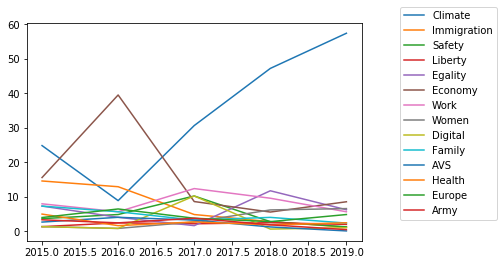

In [92]:
plot_keywords_frequency_by_year(VERTS_keywords_frequency)

### Word2Vec and cosine similiraties

We are interested in knowing if two parties are close from each other. To do that, we will first map the words of the tweets to vectors and then compute the cosine similarity.

In [95]:
# Array of all the words for each party
texts = [VERTS_text.split(" "), UDC_text.split(" "), PLR_text.split(" "), PDC_text.split(" "), VERTS_LIB_text.split(" "), PS_text.split(" ")]

We map the words of all the tweets into vectors of dimension 100, where we consider a window (context) of 10 words.

In [99]:
# Words to vectors
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]
model = Doc2Vec(documents, vector_size=100, window=10, min_count=1, workers=4)

In [96]:
keywords = topic_list_to_regex(topic_list_reg)

def text_to_keyword_list(text):
    """
    Return the list of all the keywords of a given text
    """
    keyword_list = []
    for word in text:
        if search(keywords, word) or word == 'ue':
            keyword_list.append(word)
    return keyword_list

keywords

'climat|environnement|co2|migration|asile|étranger|réfugié|sécurité|crimi|crime|sûr\x08|sûre\x08|liberté|libre|égalit|solida|économi|marché|travail|emploi|entreprise|chômage|chômeur|salaire|salarial|femme|numérique|internet|digital|famille|mariage|enfant|avs|santé|maladie|médecin|europ| ue |#ue|armée|militair|militaris|gripen'

In [98]:
# List of all the keywords for each party
UDC_list_keyword = text_to_keyword_list(UDC_text.split(" "))
PS_list_keyword = text_to_keyword_list(PS_text.split(" "))
PLR_list_keyword = text_to_keyword_list(PLR_text.split(" "))
PDC_list_keyword = text_to_keyword_list(PDC_text.split(" "))
VERTS_list_keyword = text_to_keyword_list(VERTS_text.split(" "))
VERTS_LIB_list_keyword = text_to_keyword_list(VERTS_LIB_text.split(" "))

parties_list_keyword = [UDC_list_keyword, PS_list_keyword, PLR_list_keyword, PDC_list_keyword, VERTS_list_keyword, VERTS_LIB_list_keyword]
UDC_list_keyword[:10]

['ue',
 'ue',
 'immigration',
 'travailleur',
 '#libreetsûr',
 '#libreetsûr',
 '#libreetsûr',
 '#libreetsûr',
 'libre',
 '#libreetsûre']

We can now map the keywords of the topics into their vector representation. We compute the mean of all these vectors for each party, to obtain a vector of dimension 100 for each party.

In [101]:
def mean_list_word(list_word, model):
    """
    Take a list of words and a model and return the mean of the words in their vectors representations.
    """
    mean = np.zeros(model.vector_size)
    for t in list_word:
        mean += model[t]
    return mean/len(list_word)

In [102]:
# Compute the mean (the vector representation) of each party
mean_UDC = mean_list_word(UDC_list_keyword, model)
mean_PS = mean_list_word(PS_list_keyword, model)
mean_PLR = mean_list_word(PLR_list_keyword, model)
mean_PDC = mean_list_word(PDC_list_keyword, model)
mean_VERTS = mean_list_word(VERTS_list_keyword, model)
mean_VERTS_LIB = mean_list_word(VERTS_LIB_list_keyword, model)

Now that we have a vector of dimension 100 for each party, we compute the cosine similarities to see how close each party is from other ones. We plot these values into a heatmap

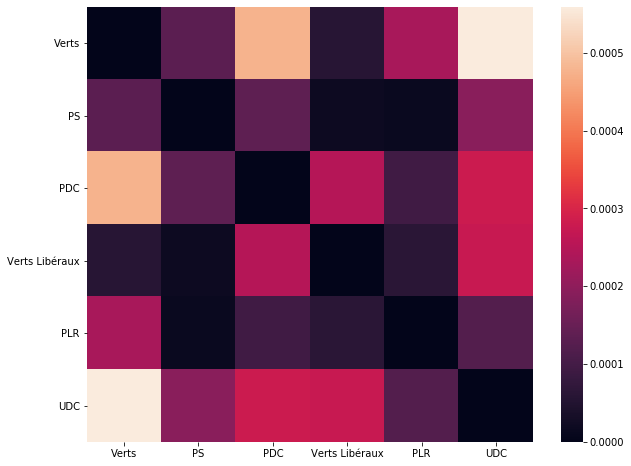

<Figure size 720x720 with 0 Axes>

In [104]:
means_parties = [mean_VERTS, mean_PS, mean_PDC, mean_VERTS_LIB, mean_PLR, mean_UDC]
parties = ["Verts", "PS", "PDC", "Verts Libéraux","PLR", "UDC"]

similiraties = np.zeros((6,6))
for i in range(0,6):
    for j in range(0,6):
        # Compute cosine similarity
        similiraties[i][j] = spatial.distance.cosine(means_parties[i], means_parties[j])

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(similiraties, xticklabels=parties, yticklabels=parties, ax=ax)
plt.figure(figsize=[10,10])
plt.show()

We can also do the same thing, but this time considering all the words and not only the keywords.

In [106]:
# The means, but with all the words of the tweets
mean2_VERTS = mean_list_word(VERTS_text.split(" "), model)
mean2_UDC = mean_list_word(UDC_text.split(" "), model)
mean2_PS = mean_list_word(PS_text.split(" "), model)
mean2_PLR = mean_list_word(PLR_text.split(" "), model)
mean2_PDC = mean_list_word(PDC_text.split(" "), model)
mean2_VERTS_LIB = mean_list_word(VERTS_LIB_text.split(" "), model)

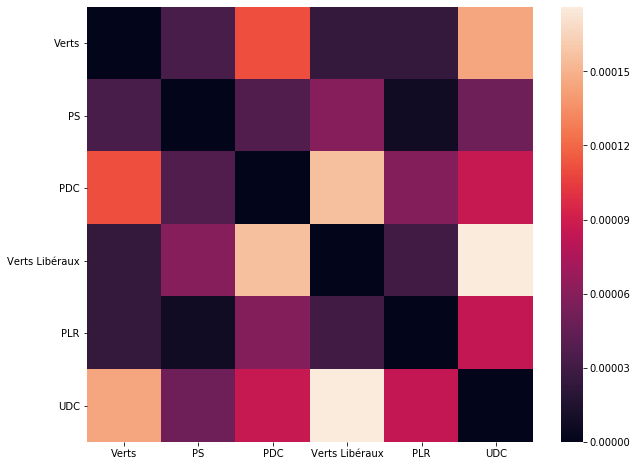

<Figure size 720x720 with 0 Axes>

In [107]:
means2_parties = [mean2_VERTS, mean2_PS, mean2_PDC, mean2_VERTS_LIB, mean2_PLR, mean2_UDC]
parties = ["Verts", "PS", "PDC", "Verts Libéraux","PLR", "UDC"]

similiraties2 = np.zeros((6,6))
for i in range(0,6):
    for j in range(0,6):
        # Compute cosine similarity
        similiraties2[i][j] = spatial.distance.cosine(means2_parties[i], means2_parties[j])
        
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(similiraties2, xticklabels=parties, yticklabels=parties, ax=ax)
plt.figure(figsize=[10,10])
plt.show()

We keep only the first heatmap, which seems to be more relevant that the second one.